# Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)


Proučavamo širenje virusa SARS-CoV-2.
Koristimo sljedeće datasetove: 

* ECDC dataset from 10.4.2020.

###### Napomena:

 * Potrebno je instalirati `geopandas` module koji ćemo koristiti za prikaz mapa. 
 Naredba: `conda install -c conda-forge geopandas` 
 * Također potrebno je instalirati i `descartes` naredbom `conda install -c conda-forge descartes`

In [1]:
#%matplotlib inline

In [2]:
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import pylab as pl
import pandas as pd
from PIL import Image

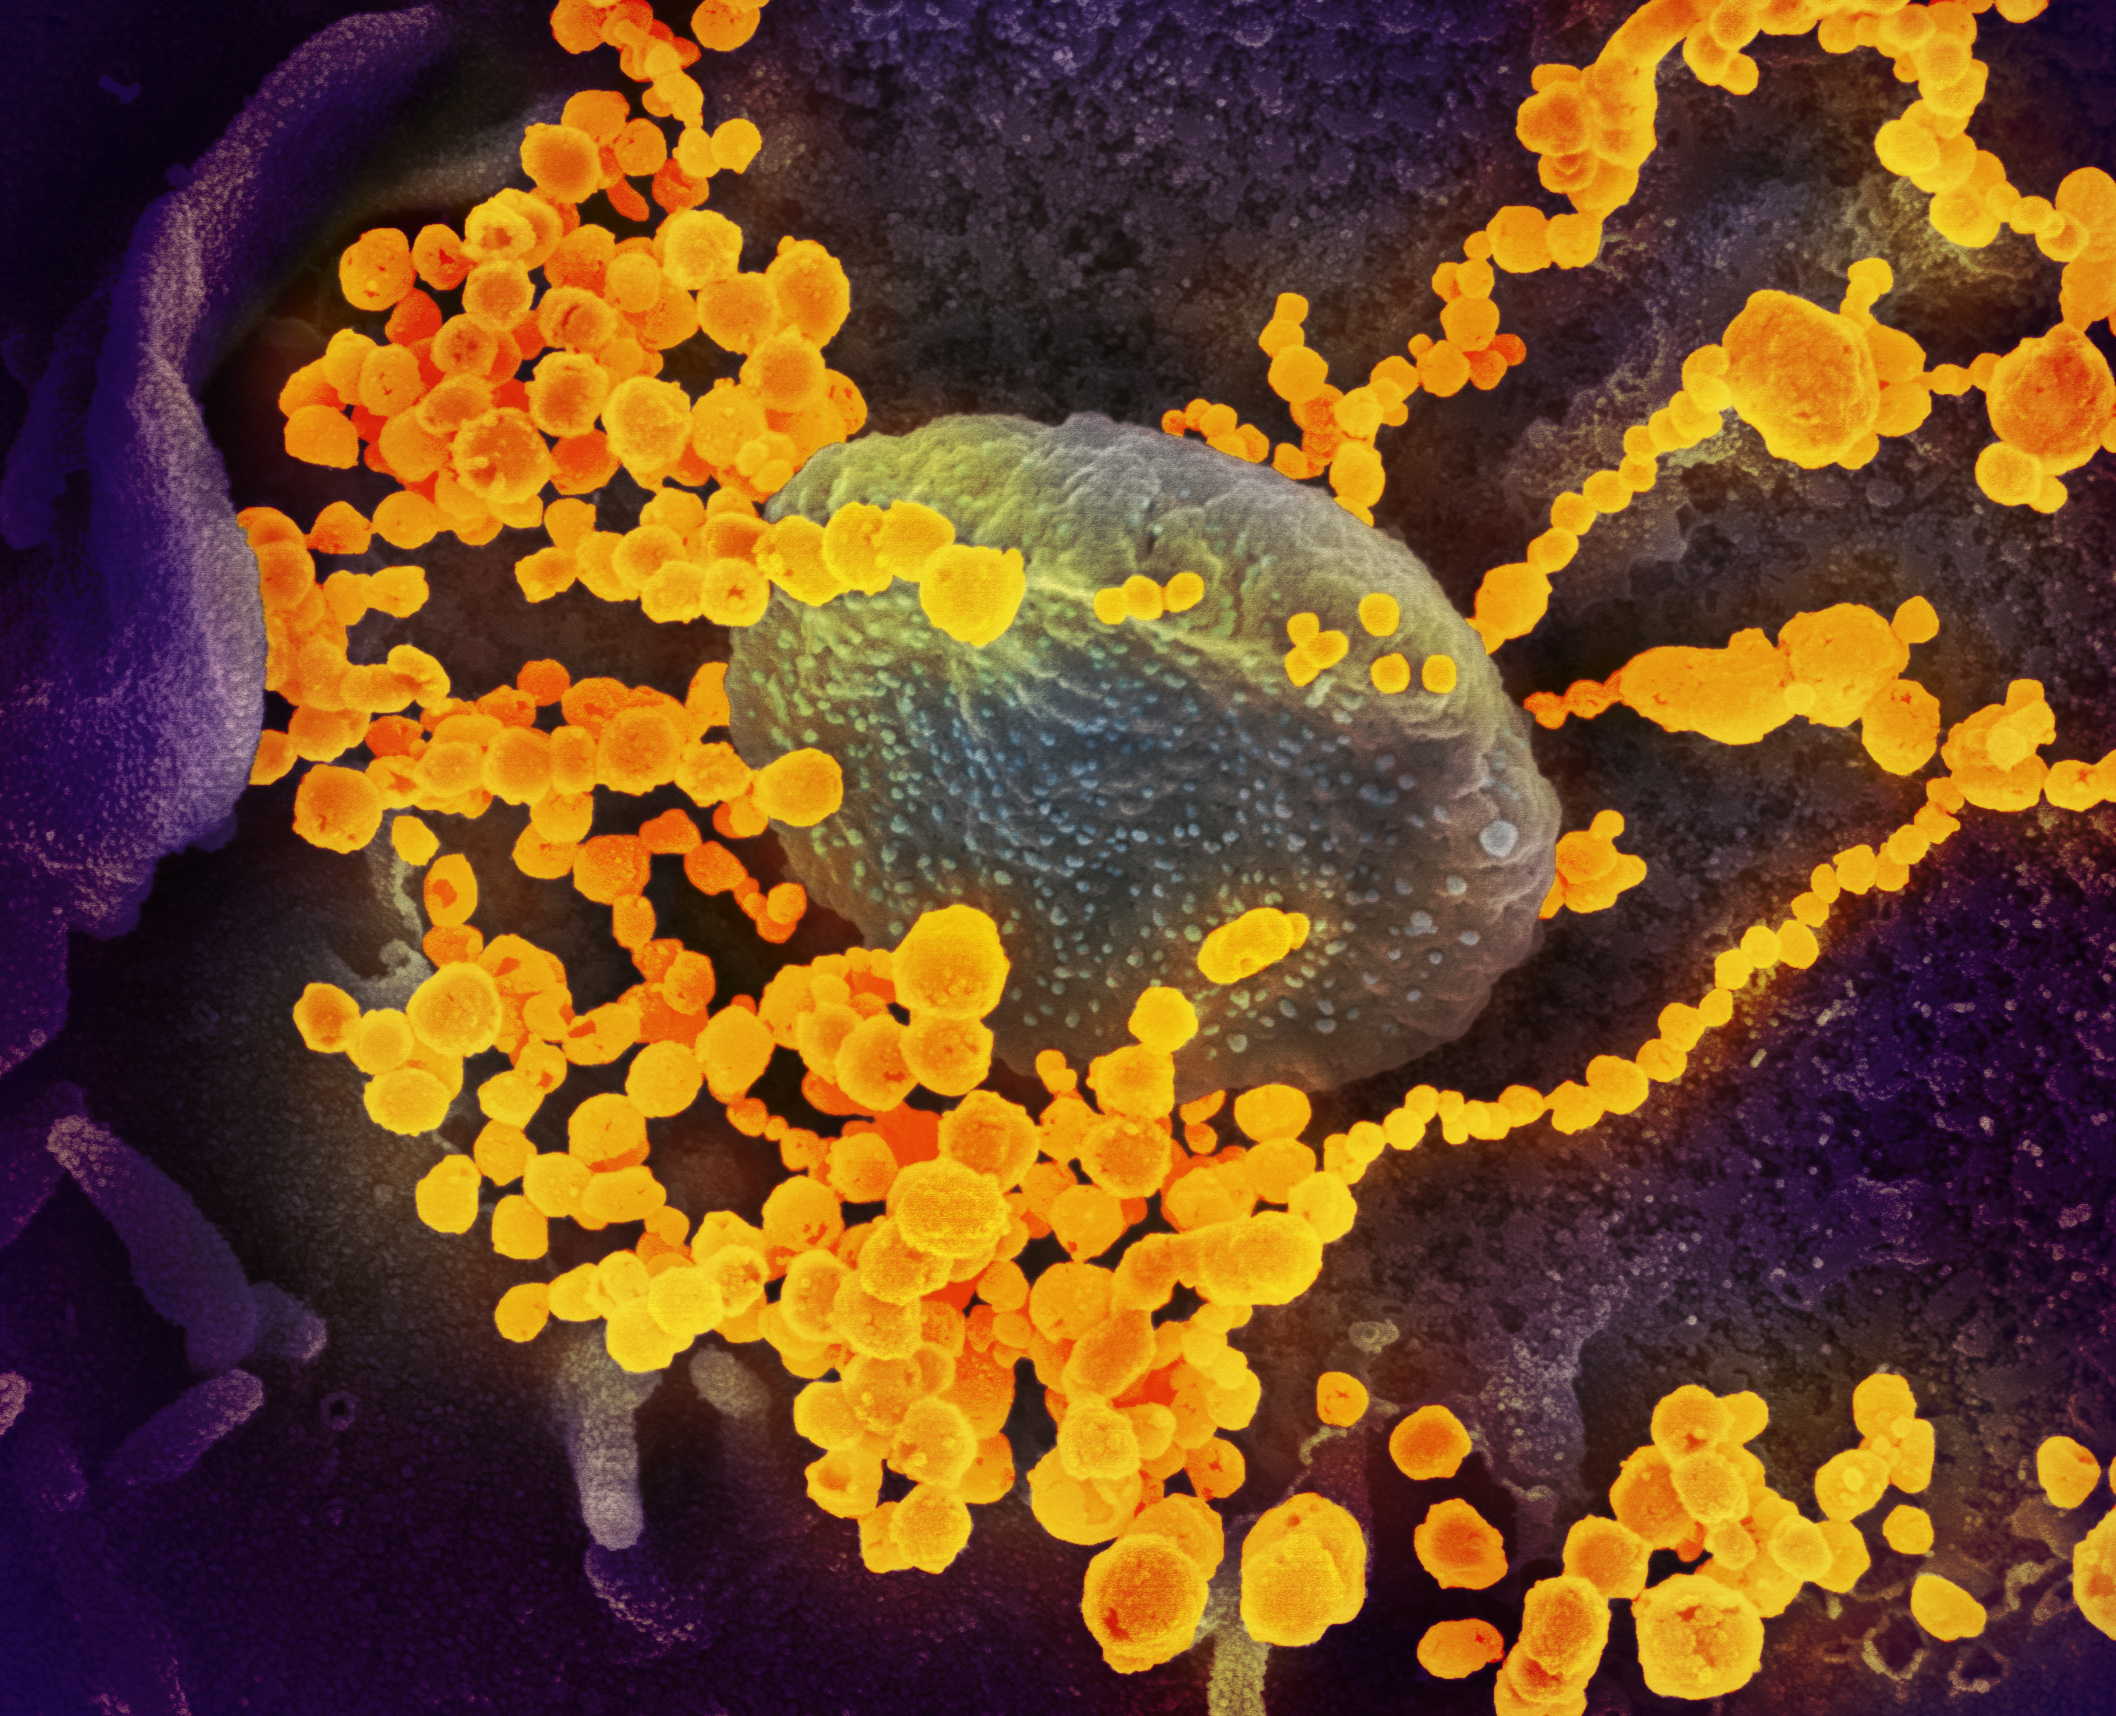

In [4]:
img  = Image.open('im.jpg')  
img

<p>Prvi dataset(ECDC) ima sljedeći oblik</p>

In [5]:
ecdc = pd.read_csv('6nDmODP4.csv',encoding='utf-8')
ecdc.dateRep = pd.to_datetime(ecdc['dateRep'], dayfirst=True)
#ecdc.info()
#ecdc.head()

Priprema datastea (odbacujemo podatke koji nam nisu od interesa).

In [6]:
ecdc=ecdc.rename(columns={"countriesAndTerritories":"Country", "dateRep":"Date"})
del ecdc['day'], ecdc ['month'], ecdc['year'], ecdc ['countryterritoryCode']
ecdc.head()

Date  cases  deaths      Country geoId  popData2018
0 2020-04-10     61       1  Afghanistan    AF   37172386.0
1 2020-04-09     56       3  Afghanistan    AF   37172386.0
2 2020-04-08     30       4  Afghanistan    AF   37172386.0
3 2020-04-07     38       0  Afghanistan    AF   37172386.0
4 2020-04-06     29       2  Afghanistan    AF   37172386.0

<h3>Globalni podaci</h3>
<p>Promotrimo globalne podatke o virusu.</p>


In [7]:
print("Broj evidentiranih zarazenih osoba u svijetu: ", ecdc['cases'].sum())
print( "Broj evidentiranih umrlih osoba u svijetu: ", ecdc['deaths'].sum())

Broj evidentiranih zarazenih osoba u svijetu:  1563857
Broj evidentiranih umrlih osoba u svijetu:  95044


Priprema dataseta za mapiranje.

In [8]:
def broj_slucajeva_u_zemlji(name):
    return (((ecdc.loc[ecdc['Country'] == name]).sum(axis=0))['cases']);

zemlje = np.array(ecdc[['Country']].drop_duplicates())

globe = pd.DataFrame( columns=['Country', 'Cases'])
#globe = pd.DataFrame({'Country':['Croatia'], 'Cases':[broj_slucajeva_u_zemlji('Croatia')]})

for name in zemlje:
    broj = ((ecdc.loc[ecdc['Country'] == name.item(0)]).sum(axis=0))['cases']
    globe = globe.append({'Country':name.item(0), 'Cases':broj}, ignore_index=True);

#globe.set_index('Country', inplace=True)
#globe.head()

<p>Mapa inficiranih osoba u svijetu</p>

In [9]:
mapa = gpd.read_file(r'World_Map.shp')
#mapa.plot()

#usklađujemo imena zemalja na mapi sa imenima u datasetu

lista = list()
for zemlja in globe['Country'].tolist():
    mapa_lista = mapa['NAME'].tolist()
    if zemlja in mapa_lista:
        pass
    else:
        #print(zemlja+ 'is not in mapa_lista')
        lista.append(zemlja)
#lista;

Ispis naredbi u file za promjenit imena drzava na mapi kako bi radio merge - maknut

In [10]:
#cod = open('cod.txt', 'w')
#for ime in lista:
#    st = 'mapa.replace(\'\', \''
#    st += ime 
#    st += '\', inplace=True)'
#    print(st, file=cod)
#    #print('mapa.replace(\'\', \'',ime,'\', inplace=True)', file=cod)
#cod.close()

In [11]:
def zamjeni(mapa, zamjenisa, ovozamjeni, preskoci):
    i=0
    for val in ovozamjeni:
        if val not in preskoci:
            mapa.replace(zamjenisa[i], val, inplace=True)
            i+=1
    return mapa;

In [12]:
preskoci =['Cases_on_an_international_conveyance_Japan','Curaçao', 'Kosovo', 'Northern_Mariana_Islands', 'Saint_Kitts_and_Nevis', 
          'Saint_Lucia', 'Saint_Vincent_and_the_Grenadines', 'Sao_Tome_and_Principe', 'Sint_Maarten', 'South_Sudan', 'Timor_Leste',
          'Trinidad_and_Tobago', 'Turks_and_Caicos_islands', 'United_States_Virgin_Islands'];
zamjenisa =['Antigua and Barbuda', 'Netherlands Antilles', 'Bosnia and Herzegovina', 'British Virgin Islands', 'Brunei Darussalam', 'Burkina Faso', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Costa Rica', 'Cote d\Ivoire', 'Czech Republic', 'Democratic Republic of the Congo', 'Dominican Republic', 'El Salvador', 'Equatorial Guinea', 'Swaziland', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Polynesia', 'Guinea-Bissau', 'Holy See (Vatican City)', 'Iran (Islamic Republic of)', 'Isle of Man', 'Lao People\'s Democratic Republic', 'Libyan Arab Jamahiriya', 'Republic of Moldova', 'Burma', 'New Caledonia', 'New Zealand', 'The former Yugoslav Republic of Macedonia', 'Papua New Guinea', 'Puerto Rico', 'San Marino', 'Saudi Arabia', 'Sierra Leone', 'South Africa', 'Korea, Republic of', 'Sri Lanka', 'Syrian Arab Republic', 'United Arab Emirates', 'United Kingdom', 'United Republic of Tanzania', 'United States', 'Viet Nam']
mapa=zamjeni(mapa, zamjenisa, lista, preskoci)

# Usklađujemo nazive stupaca
globe.rename(columns={'Country':'NAME'}, inplace=True)

union = mapa.merge(globe, on='NAME')

Primjeri...

In [13]:
union.loc[union['NAME']=='China', 'Cases']

27    82925
Name: Cases, dtype: object

In [14]:
union.loc[union['Cases']==466033,'NAME']

170    United_States_of_America
Name: NAME, dtype: object

In [15]:
union[['Cases']].max()

Cases    466033.0
dtype: float64

In [16]:
union['Cases'] = union['Cases'].astype('int64');

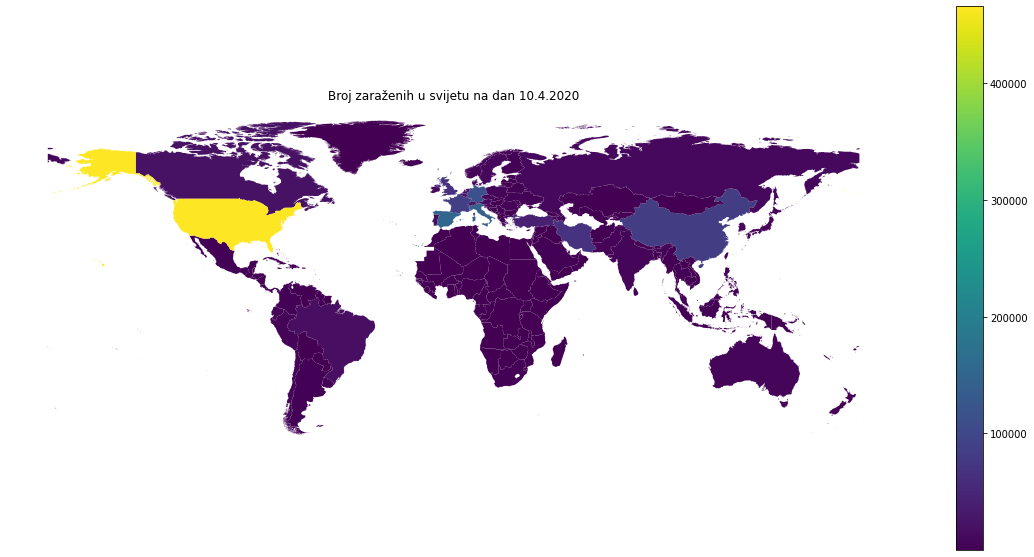

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
plt.axis('off')
union.plot(column='Cases', ax=ax, legend=True)
ax.set_title("Broj zaraženih u svijetu na dan 10.4.2020")
plt.show()

In [18]:
#spremi mapu u folder -- izbrisat
union.to_file(r'/home/user/Documents/MS/MS_projekt1_github/mapa1')

<h3> Za izbrisat - samo primjer</h3>

In [19]:
#afg=ecdc.loc[ecdc['Country'] == 'Afghanistan']
#afg.set_index('Date', inplace=True)
#del afg['popData2018'], afg['geoId'], afg['Country']
#afg.info()
#afg.plot()

<h3>Ispis podataka o zaraženim i oboljelim po zemljama + gluposti</p>

<p>Koristimo sljedeću funkciju kako bi pojednostavili korištenje.Za početak ispisimo podatke za zemlje u regiji. </p>

In [20]:
def print_country(name):
    if name == "":
        return
    tmp=ecdc.loc[ecdc['Country'] == name]
    tmp.set_index('Date', inplace=True)
    del tmp['popData2018'], tmp['geoId'], tmp['Country']
    tmp.plot()

(None, None)

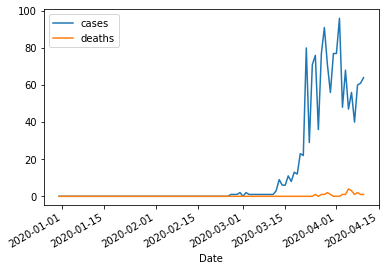

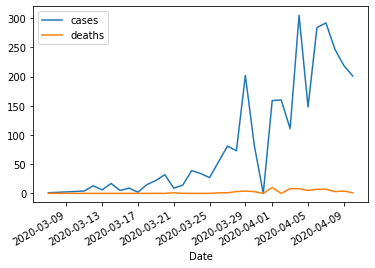

In [21]:
print_country("Croatia"), print_country("Serbia")

<p>Ispisi podatke za zemlju:</p>

Slovenia


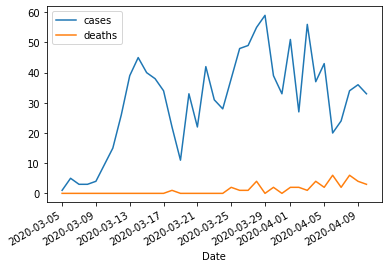

In [22]:
print_country(input())

In [23]:
broj_slucajeva_u_zemlji('Croatia')

1407

## Analiza podataka za Hrvatsku

Koristimo dataset za Hrvatsku, dostupan na GitHubu: https://github.com/viborccom/data/tree/master/covid-19/croatia

In [24]:
hr = pd.read_csv('https://raw.githubusercontent.com/viborccom/data/master/covid-19/croatia/time-series.csv' )
hr.Date = pd.to_datetime(hr['Date'], dayfirst=True)
#hr.rename(columns={'NewCases':'NoviSlučajevi', 'TotalCases':'UkupnoBrojSlučajeva', })
hr.dropna();
#hr.info()

In [25]:
hr.head()

Date  TotalCases  NewCases  PercentChange  Days  TotalRecovered  \
0 2020-04-14        1704        54           3.27    50             415   
1 2020-04-13        1650        50           3.13    49             400   
2 2020-04-12        1600        66           4.30    48             373   
3 2020-04-11        1534        39           2.61    47             323   
4 2020-04-10        1495        88           6.25    46             231   

   TotalDied  
0         31  
1         25  
2         23  
3         21  
4         21

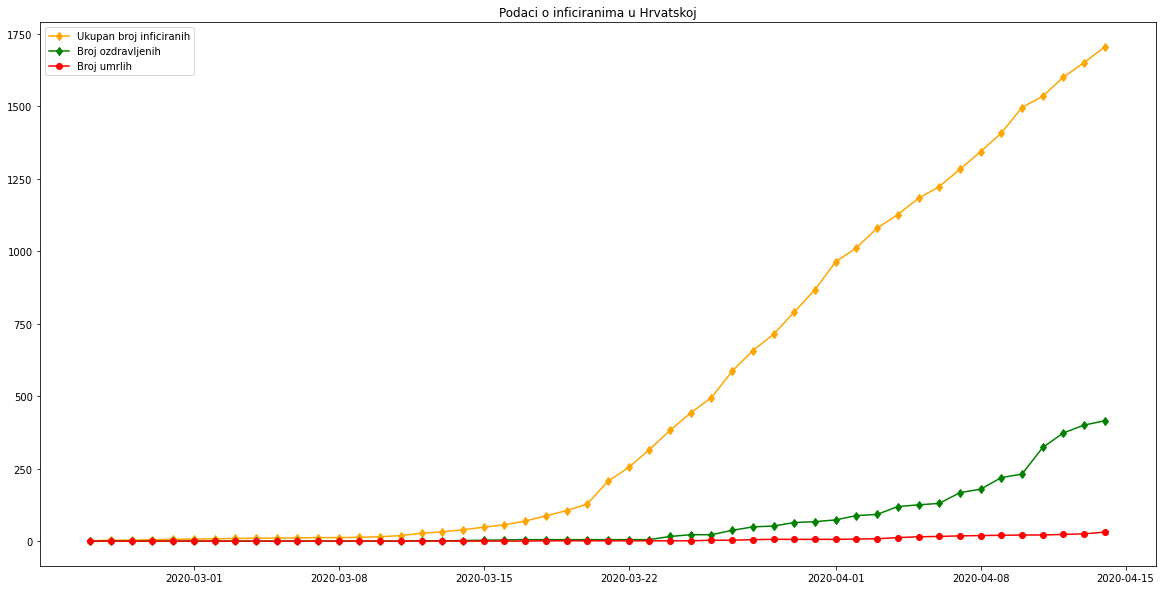

In [26]:
fig2, ax2 = plt.subplots(figsize=(20,10))
ax2.plot(hr.Date, hr.TotalCases, label='Ukupan broj inficiranih', marker='d',color="orange")
ax2.plot( hr.Date, hr.TotalRecovered, label='Broj ozdravljenih',marker='d', color="green"), 
ax2.plot( hr.Date, hr.TotalDied, label="Broj umrlih", marker='o',color="red")
ax2.legend()
ax2.set_title('Podaci o inficiranima u Hrvatskoj')
plt.show()
#hr.plot(x='Date', y=['TotalCases', 'TotalRecovered', 'TotalDied'], 
#        xlim=[hr.Date.min(), hr.Date.max()],kind='line', title="Podaci o oboljelima u Hrvatskoj")


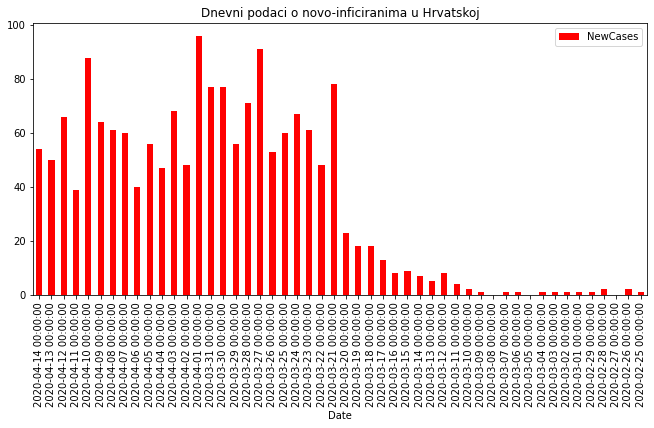

In [27]:
boxfig3=hr.plot(x='Date', y=['NewCases'], 
        xlim=[hr.Date.min(), hr.Date.max()],kind='bar',color="red",
             title="Dnevni podaci o novo-inficiranima u Hrvatskoj",figsize=(11,5),
                sort_columns=True)

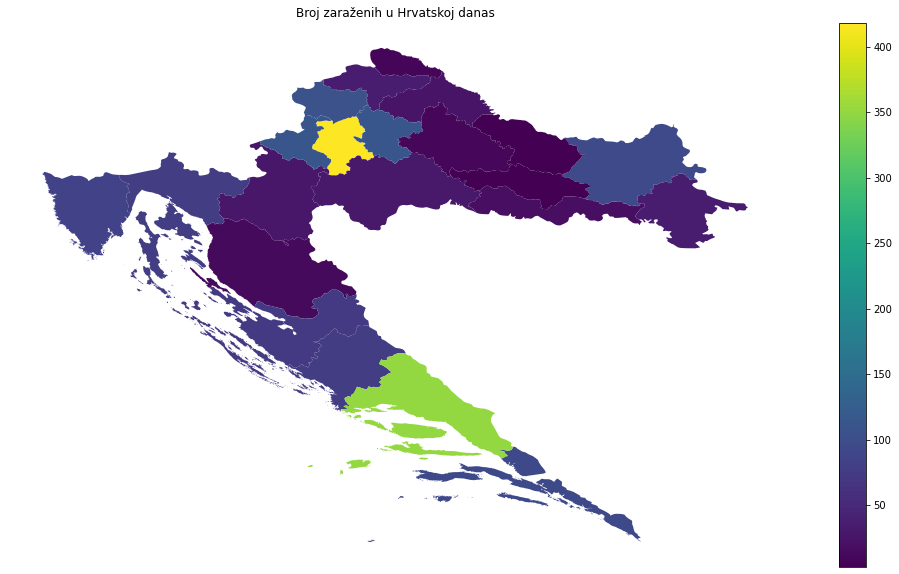

In [59]:
mapa1 = gpd.read_file(r'/home/user/Documents/MS/MS_projekt1_github/hrv_adm/2.shp')

zupanije = pd.read_csv('https://raw.githubusercontent.com/viborccom/data/master/covid-19/croatia/time-series-counties.csv' )
zupanije.dropna();

zup=pd.concat([zupanije['County'], zupanije[zupanije.columns[-1]]],
          axis=1, keys=['NAME_1', 'Cases']);

#uskladimo nazive sa onima u mapi
lista = list()
for zemlja in zup['NAME_1'].tolist():
    mapa_lista = mapa1['NAME_1'].tolist()
    if zemlja in mapa_lista:
        pass
    else:
        #print(zemlja+ 'is not in mapa_lista')
        lista.append(zemlja)
#lista
preskoci =['Hrvatska'];
zamjenisa =['Bjelovarska-Bilogorska', 'Brodsko-Posavska', 'Dubrovacko-Neretvanska',
           'Karlovacka', 'Koprivničko-Križevačka', 'Krapinsko-Zagorska',
           'Licko-Senjska', 'Medimurska', 'Osjecko-Baranjska', ''
           'Požeško-Slavonska', 'Primorsko-Goranska', 'Šibensko-Kninska', 
           'Sisacko-Moslavacka', 'Splitsko-Dalmatinska', 'Viroviticko-Podravska',
           'Vukovarsko-Srijemska']
mapa1=zamjeni(mapa1, zamjenisa, lista, preskoci)

union2 = mapa1.merge(zup, on='NAME_1')

fig5, ax5 = plt.subplots(1, 1, figsize=(20,10))
plt.axis('off')
union2.plot(column='Cases', ax=ax5, legend=True)
ax5.set_title("Broj zaraženih u Hrvatskoj danas")
plt.show()

In [57]:
zupanije;

County   21.3.   22.3.   23.3.   24.3.   25.3.   26.3.  \
0   Bjelovarsko-bilogorska       0       0       1       2       2       2   
1         Brodsko-posavska       1       1       1       2       2       2   
2   Dubrovačko-neretvanska      14      14      14      19      21      22   
3              Grad Zagreb      85     121     121     177     202     225   
4                 Istarska      25      26      26      34      37      40   
5               Karlovačka      12      12      12      16      18      18   
6   Koprivničko-križevačka       1       1       1       1       1       1   
7       Krapinsko-zagorska      14      18      18      28      33      36   
8            Ličko-senjska       1       1       1       1       1       1   
9               Međimurska       0       0       0       1       2       2   
10       Osječko-baranjska       7       7       7      19      25      31   
11       Požeško-slavonska       0       0       0       0       0       0   
12      Primorsko-goranska      18      21      21      28      34      35   
13        Šibensko-kninska       4       6       6      15      15      15   
14      Sisačko-moslavačka       3       4       4       5       5       7   
15    Splitsko-dalmatinska       7       7       7      17      23      34   
16             Varaždinska      10      11      11      11      11      14   
17   Virovitičko-podravska       0       0       0       0       0       0   
18    Vukovarsko-srijemska       0       0       0       0       1       1   
19                Zadarska       2       2       2       3       6       6   
20              Zagrebačka       2       2       2       3       3       3   
21                Hrvatska     206     254     315     382     442     495   

     27.3.  28.3.  29.3.  ...   5.4   6.4  7.4.   8.4  9.4.  10.4.  11.4  \
0        3    5.0    5.0  ...     9     9     9    10    11     11    11   
1        3    3.0    5.0  ...    15    16    17    18    18     18    18   
2       23   28.0   29.0  ...    62    63    63    63    65     69    71   
3      268  286.0  309.0  ...   331   346   360   370   382    393   400   
4       49   60.0   65.0  ...    75    75    76    79    80     81    83   
5       18   18.0   20.0  ...    21    21    22    23    23     24    26   
6        1    2.0    3.0  ...    16    16    19    20    21     23    23   
7       39   39.0   49.0  ...    80    80    83    86    92     94    96   
8        1    1.0    1.0  ...     2     2     2     2     2      3     3   
9        2    2.0    2.0  ...     4     5     6     6     6      7     7   
10      35   39.0   42.0  ...    77    77    79    81    81     82    82   
11       0    0.0    0.0  ...     3     3     3     3     3      3     3   
12      35   38.0   38.0  ...    66    67    68    69    70     73    73   
13      15   22.0   23.0  ...    35    35    42    44    53     58    61   
14      13   13.0   13.0  ...    20    20    21    22    22     24    27   
15      44   61.0   61.0  ...   165   181   196   205   246    291   302   
16      18   19.0   19.0  ...    31    33    33    35    35     35    35   
17       0    0.0    0.0  ...     4     4     4     4     4      4     4   
18       2    3.0    7.0  ...    21    24    28    29    31     32    33   
19      16   18.0   18.0  ...    52    52    56    56    60     63    67   
20       3    NaN    NaN  ...    93    93    95   101   102    107   109   
21     586  657.0  713.0  ...  1182  1222  1282  1343  1407   1495  1534   

    12.4.  13.4   14.4.  
0      11    11      11  
1      18    18      18  
2      86    93      95  
3     408   413     418  
4      83    84      85  
5      28    28      28  
6      24    25      25  
7      99   100     108  
8       7    13      13  
9       7     7       8  
10     82    91      97  
11      3     3       3  
12     75    77      77  
13     65    67      76  
14     27    29      29  
15    323   336     350  
16     35    35      35  
17      

### Pokušaj linearne regresije (Lasso)- za Hrvatsku

In [29]:
from sklearn import *
from sklearn.model_selection import train_test_split
from datetime import *

model = linear_model.Lasso()

In [30]:
x = hr.Date
x= x.map(datetime.toordinal) # sklearn ne podržava datetime
x=x.to_numpy()
y = hr.TotalCases
y=y.to_numpy()
#x-=x[-1]
x=x[::-1]#okrećemo datume tako da idu od najmanjg prema najvećem
y=y[::-1]
tmp=x[0]
x-=x[0]
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [31]:
#predviđanje za zadnjih 8 dana
trainsetx = x[:-8]
trainsety = y[:-8]
testsetx = x[-8:]
testsety = y[-8:]

trainsetx = trainsetx.reshape(-1,1)
trainsety = trainsety.reshape(-1,1)
testsetx = testsetx.reshape(-1,1)
testsety = testsety.reshape(-1,1)

In [32]:
model.fit(trainsetx, trainsety);
output = model.predict(testsetx)
output.astype('int64');
vrjednosti=np.array(hr.Date[:8])[::-1]
vrjednosti

array(['2020-04-07T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-12T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000', '2020-04-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

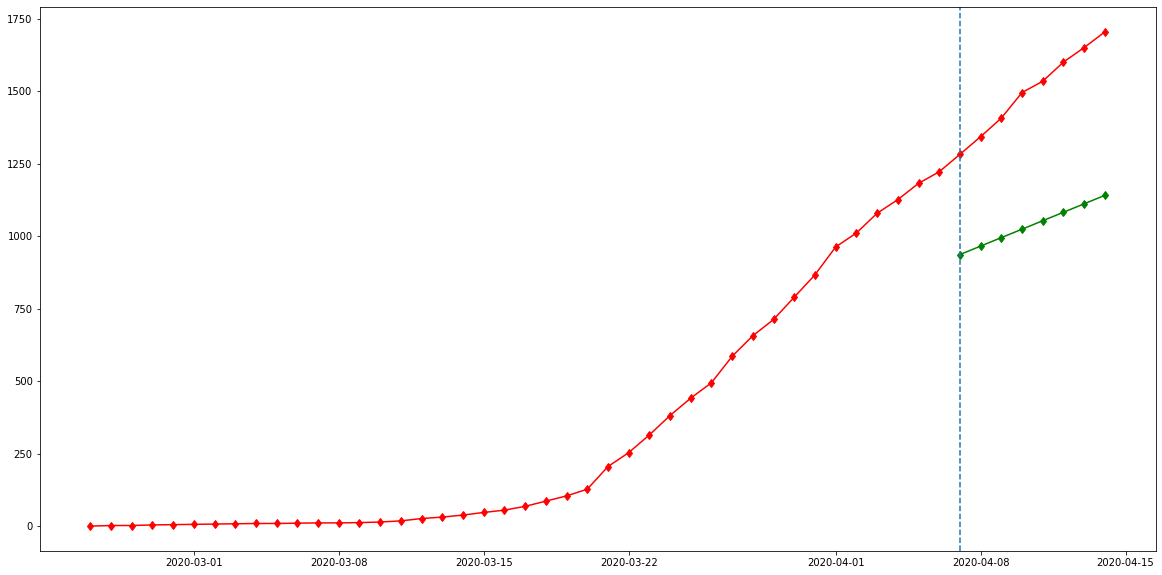

In [33]:
fig3, ax3 = plt.subplots(figsize=(20,10))
ax3.plot(hr.Date, hr.TotalCases, label='Ukupan broj inficiranih', marker='d',color="red")
ax3.plot(vrjednosti, output, label='Predviđanje', marker='d',color="green")
ax3.axvline(x=vrjednosti[0], linestyle='--')
plt.show()

Iz navedenog očita je velika greška u modelu pa zekljucujemo da navedena regresija nije pogodna za proučavanje ponašanja zaraze COVID-om 19.

### Epidemiološki SIR model

<b>SIR model</b> je matematički model širenja zarazne bolesti sastoji se od tri komponente, odnosno populacija je podjeljena u tri skupine:
<ol>
    <li>$S$ osjetljivi ("susceptible") - dio populacije koji je podložan zarazi.</li>
    <li>$I$ zaraženi ("infected") - dio populacije koji je koji je zaražen</li>
    <li> $R$ ozdravljeni ("recovered") - dio populacije koji je prebolio zarazu, generalno postaju imuni</li>
</ol>

Neka je $N$ veličina ukupne populacije. U daljnjem razmatranju, radi jednostavnosti, zanemarujemo prirodni prirast populaciji te migracije. Tada je jedini način da osoba iz skupine $S$ dođe u skupinu $R$ taj da se zarazi i preboli virusnu infekciju (pređe u skupinu $I$). 
Promjena $S(t)$ ovisi o broju osjetljivih osoba u populaciji te količini socijalnog kontakta sa osobama iz skupine zaraženih $I$.Pretpostavimo da svaka zaražena osoba ima u prosjeku $b$ kontakata u danu, tada jedna zaražena osoba dnevno generira $bS(t)$ novozaraženih. Neka je $k$ koeficjet koji mjeri brzinu napuštanja skupnie zaraženih, odnosno promjenu veličine $I(t)$. Ako je trajanje bolesti u prosjeku $d$ dana, slijedi da je  $k=1/d$. Također u našem modelu je populacija konstantna, odnosno vrijedi $S(t)+I(t)+R(t)=N$.
Pa naš model ima sljedeći oblik:
\begin{cases}
\frac{dS}{dt} & = -bSI \\
\frac{dI}{dt} & = bSI-kI \\
\frac{dR}{dt} & = kI
\end{cases}

---- dodat sliku

In [34]:
def SIR(y,t, b, k):
    S, I, R = y
    
    dSdt = -b*S*I
    dIdt = b*S*I - k*I
    dRdt = k*I
    return ([dSdt, dIdt, dRdt])

Iz navedenog vidimo da do širenja infrkcije odnosno epidemije dolazi kada se povećava broj zaraženih, odnosno vrijedi:
\begin{align}
\frac{dS}{dt}  > 0 \\
bSI-ki & > 0 \\
\frac{bSI}{k}  > i
\end{align}
Na početku epidemije cijela populacija je osjetljiva pa za iz gornjez za $S=1$ dobijemo
Iz navedenog vidimo da do širenja infrkcije odnosno epidemije dolazi kada se povećava broj zaraženih, odnosno vrijedi:
\begin{align}
1 < \frac{b}{k} & = \mathcal{R_0}
\end{align}
$\mathcal{R_0}$ je osnovni reproduktivni broj, označava očekivani broj novozaraženih generiranih s jednim zaraženim u potpuno izloženoj populaciji.

In [35]:
import scipy as sp

In [36]:
def B(a, k):
    return (2**(1/a)-1+k);

In [37]:
N = 4060000
S0 = 1
I0 = 2/N
R0 = 0.0
k = 1/30
b = B(4, k)

# vrijeme
t = np.linspace(0,180,num=181)
solution = sp.integrate.odeint(SIR, [S0, I0, R0], t, args=(b, k))
solution = N*np.array(solution)

# Pretvorba podataka za prikaz
s= pd.Series(t)
s += datetime.toordinal(hr.Date.min())
s= s.astype('int')
s.map(datetime.fromordinal);



In [38]:
def print_model(fig, ax, s, solution, xlim=-1, ylim=-1):
    
    ax4.plot(s,solution[:,0], label="S(t) - osjetljivi")
    ax4.plot(s,solution[:,1], label="I(t) - inficirani")
    ax4.plot(s,solution[:,2], label="R(t) - ozdravljeni")
    ax4.set_title("Usporedba modela sa podacima o trenitnom broju zaraženih")
    ax4.plot(hr.Date, hr.TotalCases, color="red", linestyle='--', label="službeni broj zaraženih")
    #ax4.plot(hr.Date, hr.TotalRecovered, color="green", linestyle='--', label="službeni broj ozdravljenih")
    #ax4.plot(hr.Date, hr.TotalDied, color="purple", linestyle='--', label="službeni broj umrlih")
    #ax4.plot(hr.Date, hr.TotalDied+hr.TotalRecovered, color="black", linestyle='--', label="službeni broj umrlih i ozdravljenih")

    ax4.legend()
    if xlim != -1:
        ax4.set_xlim(xlim[0], xlim[1])
    if ylim != -1:
        ax4.set_ylim(ylim[0], ylim[1])
    ax4.set_xlabel("Dani")
    ax4.set_ylabel("Populacija")
    return [fig, ax];

In [39]:
hr.head()

Date  TotalCases  NewCases  PercentChange  Days  TotalRecovered  \
0 2020-04-14        1704        54           3.27    50             415   
1 2020-04-13        1650        50           3.13    49             400   
2 2020-04-12        1600        66           4.30    48             373   
3 2020-04-11        1534        39           2.61    47             323   
4 2020-04-10        1495        88           6.25    46             231   

   TotalDied  
0         31  
1         25  
2         23  
3         21  
4         21

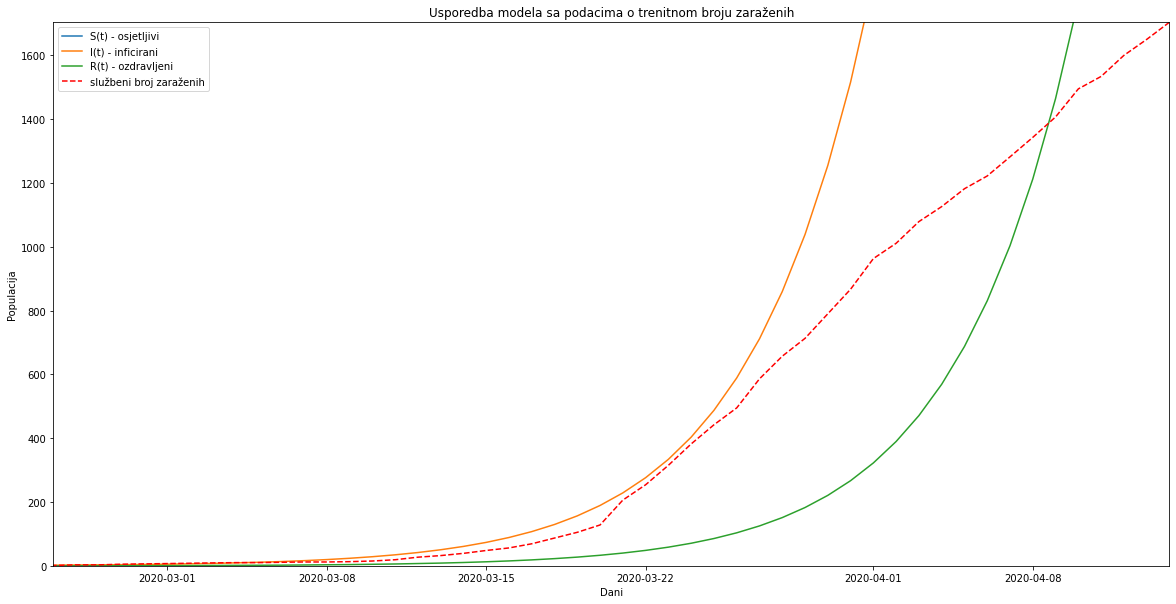

In [40]:
fig4, ax4 = plt.subplots(figsize=[20,10])
fig4, ax4 = print_model(fig4, ax4, s, solution, [hr.Date.min(), hr.Date.max()], [0,hr.TotalCases.max()])
plt.show()

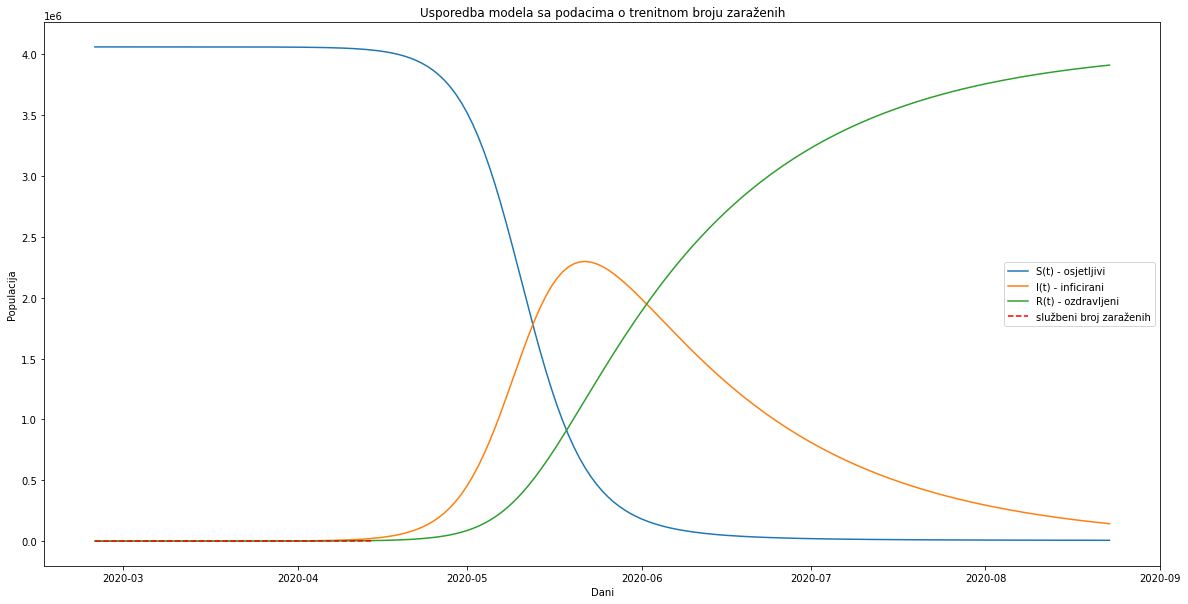

In [41]:
fig4, ax4 = plt.subplots(figsize=[20,10])
fig4, ax4 = print_model(fig4, ax4, s, solution)
plt.show()

In [42]:
#fig4, ax4 = plt.subplots(figsize=[20,10])

#ax4.plot(s,solution[:,0], label="S(t) - osjetljivi")
#ax4.plot(s,solution[:,1], label="I(t) - inficirani")
#ax4.plot(s,solution[:,2], label="R(t) - ozdravljeni")
#ax4.set_title("Usporedba modela sa podacima o trenitnom broju zaraženih")
#ax4.legend()
#ax4.plot(hr.Date, hr.TotalCases, color="red", linestyle='--', label="službeni podaci")
#ax4.set_xlim(hr.Date.min(), hr.Date.max())
#ax4.set_ylim(0, hr.TotalCases.max()+100)
#ax4.set_xlabel("Dani")
#ax4.set_ylabel("Populacija")
#plt.show()

### Mobility data

### Exp fja i logistički model

In [43]:
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

In [44]:
hr.sort_values(by='Date', inplace=True, ignore_index=True)
#hr.reindex()
hr.head()

Date  TotalCases  NewCases  PercentChange  Days  TotalRecovered  \
0 2020-02-25           1         1           0.00     1               0   
1 2020-02-26           3         2         200.00     2               0   
2 2020-02-27           3         0           0.00     3               0   
3 2020-02-28           5         2          66.67     4               0   
4 2020-02-29           6         1          20.00     5               0   

   TotalDied  
0          0  
1          0  
2          0  
3          0  
4          0

In [45]:
#hr.TotalCases[:40]

In [46]:
x= np.arange(len(hr.TotalCases))
x= add_constant(x)
model = OLS(np.log(hr.TotalCases[:20]), hr.TotalCases[:20])

In [47]:
result = model.fit()

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TotalCases   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              99.76
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    5.37e-09
Time:                        21:09:58   Log-Likelihood:                         -28.275
No. Observations:                  20   AIC:                                      58.55
Df Residuals:                      19   BIC:                                      59.55
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TotalCases     0.1200      0.012      9.988      0.000       0.095       0.145
==============================================================================
Omnibus:                       15.713   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.460
Skew:                          -1.768   Prob(JB):                     0.000725
Kurtosis:                       5.201   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

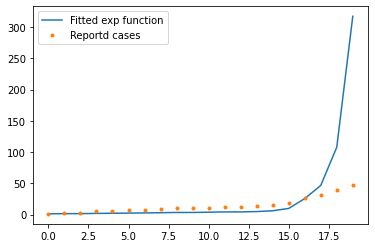

In [48]:
plt.plot(np.exp(result.predict(hr.TotalCases[:20])), 
         label="Fitted exp function"
        )
plt.plot(hr.TotalCases[:20], ".", label="Reportd cases")
plt.legend()
plt.show()

In [49]:
x=np.array(hr.TotalCases)
x

array([   1,    3,    3,    5,    6,    7,    8,    9,   10,   10,   11,
         12,   12,   13,   15,   19,   27,   32,   39,   48,   56,   69,
         87,  105,  128,  206,  254,  315,  382,  442,  495,  586,  657,
        713,  790,  867,  963, 1011, 1079, 1126, 1182, 1222, 1282, 1343,
       1407, 1495, 1534, 1600, 1650, 1704])

world_population = 1000000
days=0
infected = x[20]
while infected < world_population:
    days += 1
    infected = np.exp(result.predict([1, 13 + days]))[0]
print("numb of day until whole world is infected:{days}")

In [50]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

logistic_function = lambda x,a,b,c,d: \
    a/(1+np.exp(-c*(x-d)))+b

In [51]:
slucajevi = np.array(hr.TotalCases)

In [52]:
x


array([   1,    3,    3,    5,    6,    7,    8,    9,   10,   10,   11,
         12,   12,   13,   15,   19,   27,   32,   39,   48,   56,   69,
         87,  105,  128,  206,  254,  315,  382,  442,  495,  586,  657,
        713,  790,  867,  963, 1011, 1079, 1126, 1182, 1222, 1282, 1343,
       1407, 1495, 1534, 1600, 1650, 1704])

In [53]:
x

array([   1,    3,    3,    5,    6,    7,    8,    9,   10,   10,   11,
         12,   12,   13,   15,   19,   27,   32,   39,   48,   56,   69,
         87,  105,  128,  206,  254,  315,  382,  442,  495,  586,  657,
        713,  790,  867,  963, 1011, 1079, 1126, 1182, 1222, 1282, 1343,
       1407, 1495, 1534, 1600, 1650, 1704])

In [54]:
(a_, b_, c_, d_), _ = curve_fit(logistic_function, x, slucajevi)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/user/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


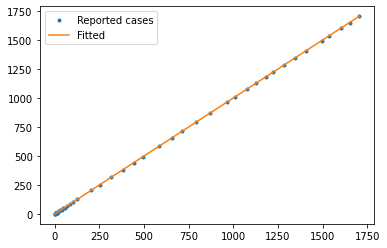

In [55]:
plt.plot(x, slucajevi, ".", label="Reported cases")
confermed_pred = logistic_function(x,a_, b_, c_, d_)
plt.plot(x, slucajevi, label="Fitted ")
plt.legend()
plt.show()

In [56]:
r2_score(slucajevi, confermed_pred)

0.7114398807839898